# Contents 

- library import
- data import
- bar charts
- chart exporting
- histograms
- sampling data
- line charts

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# create a string for the project folder path

path = r'/Users/Ashley/Desktop/Adam/Achievement 4/Instacart Analysis'

In [4]:
# import data frame

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'data_after_4_8.pkl'))

# Creating Bar Charts and Exporting Charts

<AxesSubplot:>

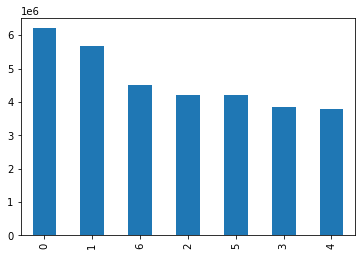

In [5]:
# creating a bar chart

df['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

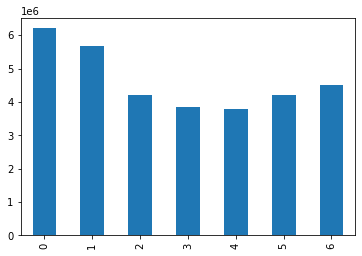

In [6]:
# bar chart with different sorting

df['orders_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

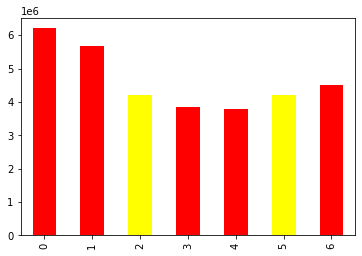

In [8]:
# with color

df['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['red', 'red', 'yellow'])

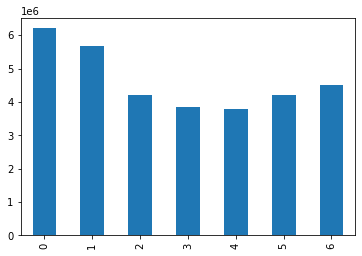

In [12]:
# assign plot to the name bar

bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar()

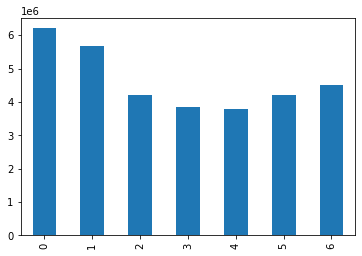

In [14]:
# call up the chart

bar.figure

In [15]:
# export the chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visuals', 'bar_orders_dow.png'))

# Creating Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

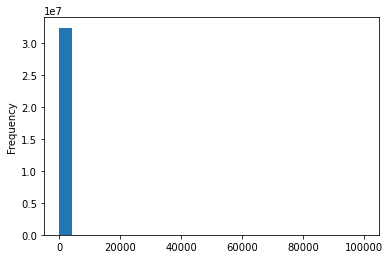

In [16]:
df['prices'].plot.hist(bins = 25)

In [18]:
df['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<AxesSubplot:xlabel='prices', ylabel='prices'>

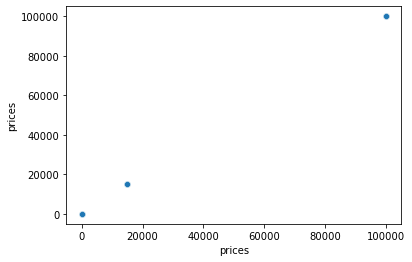

In [21]:
sns.scatterplot(x = 'prices', y = 'prices', data = df)

In [22]:
df.loc[df['prices']>100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,days_since_median,frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,Regularly Busy,High Range Product,Regular Days,Most Orders,40,Regular Customer,108.648299,High Spender,5.0,Frequent Customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,Regularly Busy,High Range Product,Regular Days,Average Orders,40,Regular Customer,108.648299,High Spender,5.0,Frequent Customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,Regularly Busy,High Range Product,Regular Days,Average Orders,4,New Customer,1154.792308,High Spender,12.0,Regular Customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,Busiest Day,High Range Product,Busiest Days,Average Orders,4,New Customer,1154.792308,High Spender,12.0,Regular Customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,Regularly Busy,High Range Product,Busiest Days,Average Orders,16,Regular Customer,114.426619,High Spender,23.0,Non Frequent Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,Busiest Day,High Range Product,Busiest Days,Average Orders,39,Regular Customer,1106.743956,High Spender,4.0,Frequent Customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,Busiest Day,High Range Product,Busiest Days,Average Orders,39,Regular Customer,1106.743956,High Spender,4.0,Frequent Customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,Regularly Busy,High Range Product,Slowest Days,Most Orders,15,Regular Customer,451.153540,High Spender,5.0,Frequent Customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,Regularly Busy,High Range Product,Slowest Days,Average Orders,12,Regular Customer,1178.381871,High Spender,12.0,Regular Customer


In [23]:
df.loc[df['prices'] >100, 'prices'] =np.nan

In [24]:
df['prices'].max()

25.0

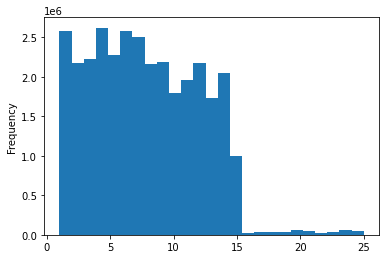

In [28]:
hist = df['prices'].plot.hist(bins = 25)

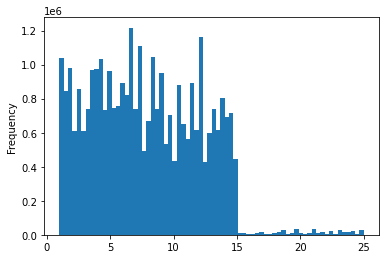

In [29]:
hist2 = df['prices'].plot.hist(bins = 70)

In [31]:
hist2.figure.savefig(os.path.join(path, '04 Analysis', 'Visuals', 'hist_prods_prices.png'))

# Creating Line Charts and Sampling Data

In [32]:
# create a 70/30 sample

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [33]:
# store 70 percent in big

big = df[dev]

In [34]:
# store 30 percent in small

small = df[~dev]

In [35]:
len(df)

32404859

In [36]:
len(big) + len(small)

32404859

In [37]:
df2 = small[['orders_day_of_week', 'prices']]

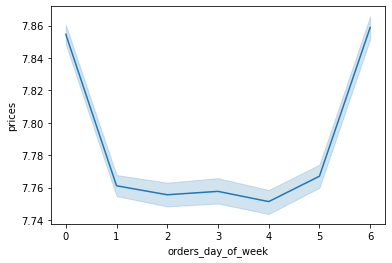

In [41]:
line = sns.lineplot(data = df2, x = 'orders_day_of_week', y = 'prices')

In [42]:
df.describe()

,product_id,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,average_price,days_since_median
count,3.240486e+07,3.240486e+07,3.240486e+07,3.239973e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240485e+07
mean,2.559866e+04,7.119612e+01,9.919792e+00,7.790994e+00,1.710745e+06,1.029372e+05,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,8.352547e+00,5.895873e-01,3.305217e+01,1.198023e+01,1.039776e+01
std,1.408400e+04,3.821139e+01,6.281485e+00,4.241809e+00,9.872988e+05,5.946610e+04,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,7.127071e+00,4.919087e-01,2.515525e+01,8.324227e+01,7.131754e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.354400e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.559470e+05,5.142200e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,1.300000e+01,7.387298e+00,6.000000e+00
50%,2.530200e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.711049e+06,1.026160e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,6.000000e+00,1.000000e+00,2.600000e+01,7.824786e+00,8.000000e+00
75%,3.794700e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565499e+06,1.543890e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.100000e+01,1.000000e+00,4.700000e+01,8.254023e+00,1.300000e+01
max,4.968800e+04,1.340000e+02,2.100000e+01,2.500000e+01,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,1.000000e+00,9.900000e+01,2.500542e+04,3.000000e+01
